# Data Wrangling (part 1)

The process of cleaning, organizing, and transforming "raw" data with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In this notebook we will look at:

- Importing data
- Handling missing values
- Handling incorrect data
- Removing duplicated data
- Detecting outliers
- Data Transformation

Consider the _data_wrangling_dataset.xlsx_ dataset.

| Variable | Description            | Possible values                 |
|-----------|----------------------|--------------------------|
| Duration  | Duration of exercise | {30, 45, 60}  |
| Gender      | Date of exercise     | {Male, Female}              |
| Pulse     | Heart rate during exercise | [40, 120] |
| Maxpulse  | Maximum heart rate achieved | [90, 200] |
| Calories  | Calories burned during exercise | [0, 800] |



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
original_df = pd.read_excel('data_wrangling_dataset.xlsx')
df = original_df.copy()

## Explore

In [3]:
df.head()

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,NaN
4,30,Female,109.0,133.0,195.1


In [4]:
df.shape

(16, 5)

In [5]:
df.columns

Index(['Duration', 'Gender', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  16 non-null     int64  
 1   Gender    16 non-null     object 
 2   Pulse     14 non-null     float64
 3   Maxpulse  14 non-null     float64
 4   Calories  12 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 772.0+ bytes


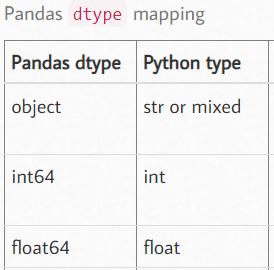

## Handling missing values:

In [7]:
df.isnull()

,Duration,Gender,Pulse,Maxpulse,Calories
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,True
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,True,True,True


In [8]:
df.isnull().sum()

Duration    0
Gender      0
Pulse       2
Maxpulse    2
Calories    4
dtype: int64

In [9]:
df.isnull().sum(axis = 1)

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     3
10    0
11    0
12    0
13    3
14    1
15    0
dtype: int64

When dealing with missing data you want to think about why the data is missing:

**Is this value missing because it wasn't recorded or because it doesn't exist?**

### a. Dropping rows/columns with missing data

We use the dropna() method. By default, the dropna() method returns a new DataFrame, and **will not change the original.**

If you want to change the original DataFrame, use the `inplace = True` argument: `df.dropna(inplace = True)`

In [10]:
df.dropna()

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
6,30,Female,103.0,0.0,329.3
7,60,Male,100.0,120.0,250.7
8,60,Male,100.0,120.0,250.7
10,60,Malee,104.0,132.0,379.3
11,60,Female,98.0,200.0,275.0


In [11]:
df.dropna(axis = 1)

,Duration,Gender
0,45,Male
1,60,Female
2,60,Male
3,45,Male
4,30,Female
5,60,Male
6,30,Female
7,60,Male
8,60,Male
9,45,Female


In [12]:
df.dropna(thresh = 3)

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,NaN
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
6,30,Female,103.0,0.0,329.3
7,60,Male,100.0,120.0,250.7
8,60,Male,100.0,120.0,250.7
10,60,Malee,104.0,132.0,379.3


### b. Replacing missing values

Another way of dealing with empty cells is to insert a new value instead.

The fillna() method allows us to replace empty cells with a value:

In [13]:
df.fillna('XXXXX')

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,XXXXX
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
6,30,Female,103.0,0.0,329.3
7,60,Male,100.0,120.0,250.7
8,60,Male,100.0,120.0,250.7
9,45,Female,XXXXX,XXXXX,XXXXX


In [14]:
df['Calories'].fillna('XXXXX')

0     409.1
1     479.0
2     374.0
3     XXXXX
4     195.1
5     269.0
6     329.3
7     250.7
8     250.7
9     XXXXX
10    379.3
11    275.0
12    215.2
13    XXXXX
14    XXXXX
15    323.0
Name: Calories, dtype: object

A common way to replace empty cells, is to calculate the mean, median or mode value of the column.

Pandas uses the mean() median() and mode() methods to calculate the respective values for a specified column.

## Handling incorrect data

"Incorrect data" does not have to be "empty cells" or "wrong format", it can just be wrong, like if someone having an height (in m) of "199" instead of "1.99".

Sometimes you can spot wrong data by looking at the data set, because you have an expectation of what it should be.

In this case, we were given that:

| Variable | Description            | Possible values                 |
|-----------|----------------------|--------------------------|
| Duration  | Duration of exercise | {30, 45, 60}  |
| Gender      | Date of exercise     | {Male, Female}              |
| Pulse     | Heart rate during exercise | [40, 120] |
| Maxpulse  | Maximum heart rate achieved | [90, 200] |
| Calories  | Calories burned during exercise | [0, 800] |

In [15]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,16.000000,14.000000,14.000000,12.000000
mean,52.500000,103.142857,149.428571,312.450000
std,10.954451,6.757983,138.665460,85.215123
min,30.000000,90.000000,0.000000,195.100000
25%,45.000000,98.500000,120.000000,250.700000
50%,60.000000,103.000000,127.000000,299.000000
75%,60.000000,107.750000,133.750000,375.325000
max,60.000000,117.000000,600.000000,479.000000


In [ ]:
# Duration?


In [ ]:
# Gender?

### a. Replacing incorrect values

One way to fix wrong values is to replace them with something else.

In [16]:
df['Gender'].value_counts()

Male      7
Female    7
Malee     1
Fmale     1
Name: Gender, dtype: int64

In [17]:
positions = df.index[df['Gender'] == 'Malee']
positions

Int64Index([10], dtype='int64')

In [18]:
df.loc[10]

Duration       60
Gender      Malee
Pulse       104.0
Maxpulse    132.0
Calories    379.3
Name: 10, dtype: object

In [20]:
df.loc[10, 'Gender'] = 'Male'

In [21]:
df

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,NaN
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
6,30,Female,103.0,0.0,329.3
7,60,Male,100.0,120.0,250.7
8,60,Male,100.0,120.0,250.7
9,45,Female,NaN,NaN,NaN


In [22]:
df = original_df.copy()

### b. Deleting rows with incorrect values

Another way of handling wrong data is to remove the rows that contains wrong data.

In [23]:
df[(df['Maxpulse'] >= 90) & (df['Maxpulse'] < 200)]

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,NaN
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
7,60,Male,100.0,120.0,250.7
8,60,Male,100.0,120.0,250.7
10,60,Malee,104.0,132.0,379.3
12,60,Fmale,98.0,120.0,215.2
15,60,Male,103.0,123.0,323.0


## Handling duplicates 

In [24]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
dtype: bool

In [25]:
df.duplicated().sum()

1

In [26]:
df.drop_duplicates() # can inlclude inplace = True

,Duration,Gender,Pulse,Maxpulse,Calories
0,45,Male,110.0,130.0,409.1
1,60,Female,117.0,20.0,479.0
2,60,Male,110.0,136.0,374.0
3,45,Male,104.0,134.0,NaN
4,30,Female,109.0,133.0,195.1
5,60,Male,98.0,124.0,269.0
6,30,Female,103.0,0.0,329.3
7,60,Male,100.0,120.0,250.7
9,45,Female,NaN,NaN,NaN
10,60,Malee,104.0,132.0,379.3


## Handling outliers

Outliers are often represented as individual points beyond the "whiskers" of the box plot.

To identify outliers you can use the following steps:

1. Calculate the Quartiles and IQR:
Calculate the first quartile (Q1) and the third quartile (Q3) of your data, and then calculate the interquartile range (IQR) as the difference between Q3 and Q1.

2. Define Whiskers:
Calculate the upper and lower bounds for the whiskers of the box plot using the formula:

Upper bound: Q3 + 1.5 * IQR

Lower bound: Q1 - 1.5 * IQR

3. Identify Outliers:
Any data points that fall above the upper whisker or below the lower whisker can be considered outliers.

In [27]:
# Calculate Q1, Q3, and IQR
Q1 = df['Maxpulse'].quantile(0.25)
Q3 = df['Maxpulse'].quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for whiskers
upper_whisker = Q3 + 1.5 * IQR
lower_whisker = Q1 - 1.5 * IQR

# Identify and print outliers
outliers = df[(df['Maxpulse'] > upper_whisker) | (df['Maxpulse'] < lower_whisker)]
print("Outliers:")
print(outliers)

Outliers:
    Duration  Gender  Pulse  Maxpulse  Calories
1         60  Female  117.0      20.0     479.0
6         30  Female  103.0       0.0     329.3
11        60  Female   98.0     200.0     275.0
14        45  Female   90.0     600.0       NaN


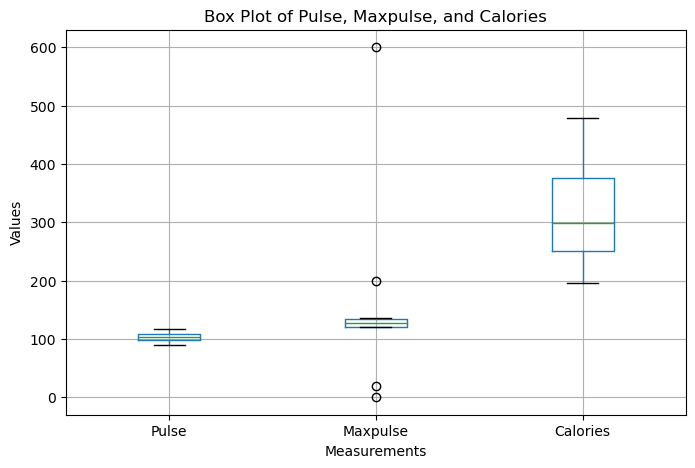

In [28]:
# Set the figure size
plt.figure(figsize=(8, 5))  # Adjust the figsize values as needed

df.boxplot(column = ['Pulse', 'Maxpulse', 'Calories'])

# Add labels and title
plt.xlabel('Measurements')
plt.ylabel('Values')
plt.title('Box Plot of Pulse, Maxpulse, and Calories')

# Display the plot
plt.show()

Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html